<a href="https://colab.research.google.com/github/zacharias1219/ml_basic_models/blob/main/Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data = pd.read_csv("/content/car data.csv")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car_data.shape

(301, 9)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)

car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [10]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y = car_data['Selling_Price']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.1)

In [25]:
lin_model = LinearRegression()

In [27]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [28]:
training_data_prediction = lin_model.predict(X_train)


In [29]:
error_score = metrics.r2_score(y_train,training_data_prediction)

In [30]:
error_score

0.888658825760646

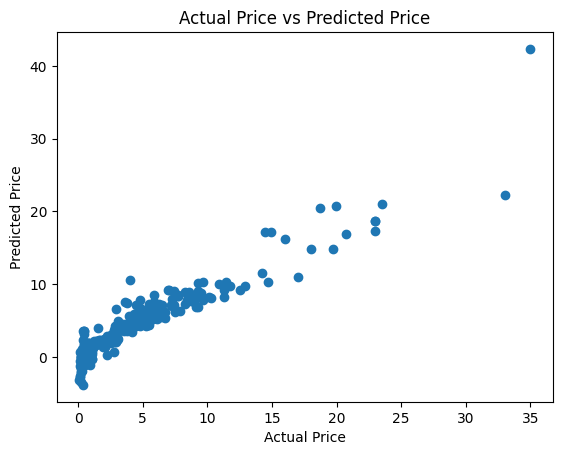

In [32]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [34]:
test_data_prediction = lin_model.predict(X_test)

In [35]:
error_score = metrics.r2_score(y_test,test_data_prediction)

In [36]:
error_score

0.3931106765727391

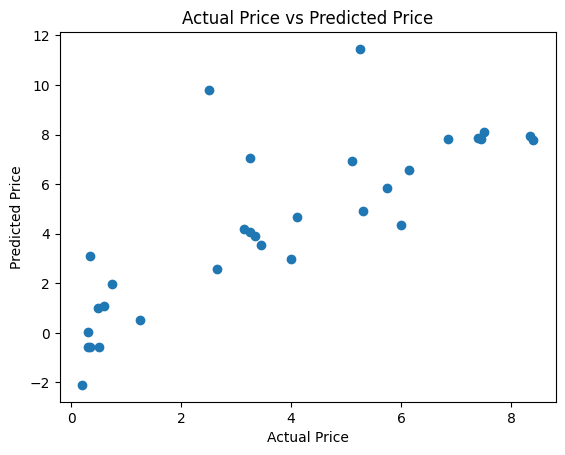

In [37]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [38]:
lasso_model = Lasso()

In [39]:
lasso_model.fit(X_train,y_train)

Lasso()

In [40]:
training_data_prediction = lasso_model.predict(X_train)


In [41]:
error_score = metrics.r2_score(y_train,training_data_prediction)

In [42]:
error_score

0.8534437888277806

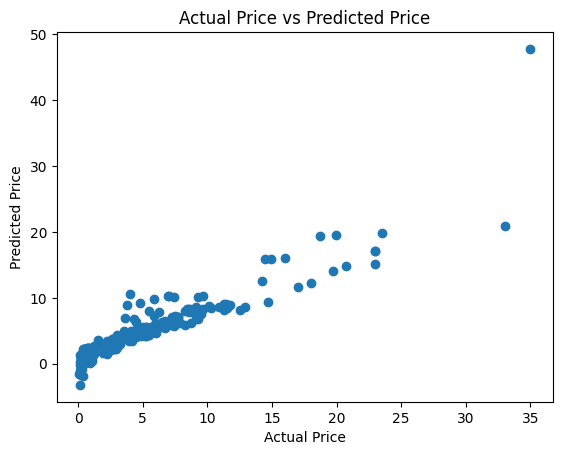

In [43]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [44]:
test_data_prediction = lasso_model.predict(X_test)

In [45]:
error_score = metrics.r2_score(y_test,test_data_prediction)

In [46]:
error_score

0.46123204958260644

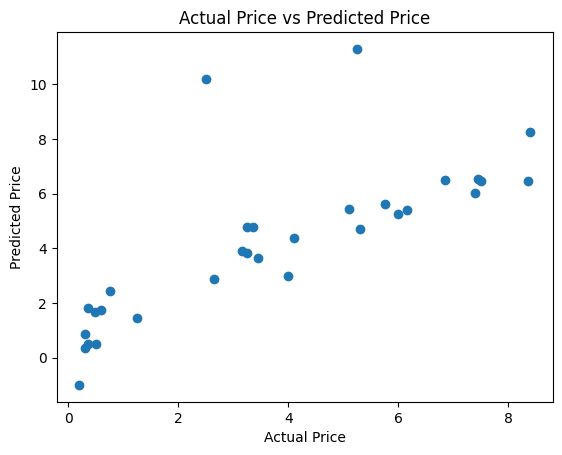

In [47]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()